## Setup

In [2]:
# Imports
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ring_dim_df = pd.read_csv("../timeCSVs/ringDimOptimization.csv")
optimized_df = pd.read_csv("../timeCSVs/optimizedResults.csv")

ring_dim_df.drop([' setup', ' encryption', ' homomorphic', ' decryption', ' plaintext', ' value'], axis=1,inplace=True)
optimized_df.drop([' setup', ' encryption', ' homomorphic', ' decryption', ' plaintext', ' value'], axis=1,inplace=True)

ring_dim_df.head()

,type,ringDim,total
0,n8192-coef-sum,8192,112
1,n8192-coef-sum,8192,78
2,n8192-coef-sum,8192,76
3,n8192-coef-sum,8192,77
4,n8192-coef-sum,8192,73


# Grouping by Total Elements

In [5]:
n8192_df = ring_dim_df[ring_dim_df['type'].str.contains('n8192')]
n50x8192_df = ring_dim_df[ring_dim_df['type'].str.contains('n50x8192')]
n100x8192_df = ring_dim_df[ring_dim_df['type'].str.contains('n100x8192')]
n250x8192_df = ring_dim_df[ring_dim_df['type'].str.contains('n250x8192')]
n500x8192_df = ring_dim_df[ring_dim_df['type'].str.contains('n500x8192')]
n1000x8192_df = ring_dim_df[ring_dim_df['type'].str.contains('n1000x8192')]

optimized_n8192_df = optimized_df[optimized_df['type'].str.contains('n8192')]
optimized_n50x8192_df = optimized_df[optimized_df['type'].str.contains('n50x8192')]
optimized_n100x8192_df = optimized_df[optimized_df['type'].str.contains('n100x8192')]
optimized_n250x8192_df = optimized_df[optimized_df['type'].str.contains('n250x8192')]
optimized_n500x8192_df = optimized_df[optimized_df['type'].str.contains('n500x8192')]
optimized_n1000x8192_df = optimized_df[optimized_df['type'].str.contains('n1000x8192')]

In [4]:
coef_sum_df = ring_dim_df[ring_dim_df['type'].str.contains('coef-sum')]
coef_sum_mean_df = coef_sum_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
coef_sum_mean_df


,type,ringDim,total
0,n1000x8192-coef-sum,1024,14524.470000
1,n1000x8192-coef-sum,2048,13967.010000
2,n1000x8192-coef-sum,4096,14178.530000
3,n1000x8192-coef-sum,8192,14256.840000
4,n100x8192-coef-sum,1024,1431.920000
5,n100x8192-coef-sum,2048,1415.960000
6,n100x8192-coef-sum,4096,1442.610000
7,n100x8192-coef-sum,8192,1493.550000
8,n250x8192-coef-sum,1024,3550.380000
9,n250x8192-coef-sum,2048,3513.980000


In [6]:
n8192_mean_df = n8192_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
n8192_mean_df.loc[n8192_mean_df['type'] == 'n8192-coef-inner', 'type'] = 'coef_inner_product'
n8192_mean_df.loc[n8192_mean_df['type'] == 'n8192-coef-sum', 'type'] = 'coef_sum'
n8192_mean_df.loc[n8192_mean_df['type'] == 'n8192-slot-inner', 'type'] = 'slot_inner_product'
n8192_mean_df.loc[n8192_mean_df['type'] == 'n8192-slot-sum', 'type'] = 'slot_sum'

optimized_n8192_mean_df = optimized_n8192_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
optimized_n8192_mean_df.loc[optimized_n8192_mean_df['type'] == 'n8192-coef-inner', 'type'] = 'coef_inner_product'
optimized_n8192_mean_df.loc[optimized_n8192_mean_df['type'] == 'n8192-coef-sum', 'type'] = 'coef_sum'
optimized_n8192_mean_df.loc[optimized_n8192_mean_df['type'] == 'n8192-slot-inner', 'type'] = 'slot_inner_product'
optimized_n8192_mean_df.loc[optimized_n8192_mean_df['type'] == 'n8192-slot-sum', 'type'] = 'slot_sum'


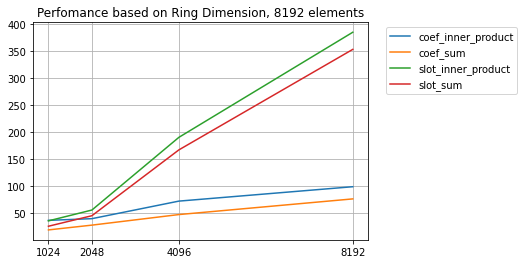

In [18]:
fig, ax = plt.subplots()

ax.plot(n8192_mean_df[n8192_mean_df['type'] == 'coef_inner_product'][' ringDim'], n8192_mean_df[n8192_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(n8192_mean_df[n8192_mean_df['type'] == 'coef_sum'][' ringDim'], n8192_mean_df[n8192_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(n8192_mean_df[n8192_mean_df['type'] == 'slot_inner_product'][' ringDim'], n8192_mean_df[n8192_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(n8192_mean_df[n8192_mean_df['type'] == 'slot_sum'][' ringDim'], n8192_mean_df[n8192_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Perfomance based on Ring Dimension, 8192 elements")
ax.grid('on')

plt.xticks([1024, 2048, 4096, 8192])
plt.show()

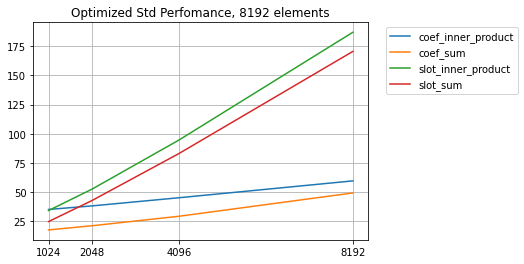

In [34]:
fig, ax = plt.subplots()

ax.plot(optimized_n8192_mean_df[optimized_n8192_mean_df['type'] == 'coef_inner_product'][' ringDim'], optimized_n8192_mean_df[optimized_n8192_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(optimized_n8192_mean_df[optimized_n8192_mean_df['type'] == 'coef_sum'][' ringDim'], optimized_n8192_mean_df[optimized_n8192_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(optimized_n8192_mean_df[optimized_n8192_mean_df['type'] == 'slot_inner_product'][' ringDim'], optimized_n8192_mean_df[optimized_n8192_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(optimized_n8192_mean_df[optimized_n8192_mean_df['type'] == 'slot_sum'][' ringDim'], optimized_n8192_mean_df[optimized_n8192_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Optimized Std Perfomance, 8192 elements")
ax.grid('on')

plt.xticks([1024, 2048, 4096, 8192])
plt.show()

In [7]:
n50x8192_mean_df = n50x8192_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
n50x8192_mean_df.loc[n50x8192_mean_df['type'] == 'n50x8192-coef-inner', 'type'] = 'coef_inner_product'
n50x8192_mean_df.loc[n50x8192_mean_df['type'] == 'n50x8192-coef-sum', 'type'] = 'coef_sum'
n50x8192_mean_df.loc[n50x8192_mean_df['type'] == 'n50x8192-slot-inner', 'type'] = 'slot_inner_product'
n50x8192_mean_df.loc[n50x8192_mean_df['type'] == 'n50x8192-slot-sum', 'type'] = 'slot_sum'

optimized_n50x8192_mean_df = optimized_n50x8192_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
optimized_n50x8192_mean_df.loc[optimized_n50x8192_mean_df['type'] == 'n50x8192-coef-inner', 'type'] = 'coef_inner_product'
optimized_n50x8192_mean_df.loc[optimized_n50x8192_mean_df['type'] == 'n50x8192-coef-sum', 'type'] = 'coef_sum'
optimized_n50x8192_mean_df.loc[optimized_n50x8192_mean_df['type'] == 'n50x8192-slot-inner', 'type'] = 'slot_inner_product'
optimized_n50x8192_mean_df.loc[optimized_n50x8192_mean_df['type'] == 'n50x8192-slot-sum', 'type'] = 'slot_sum'

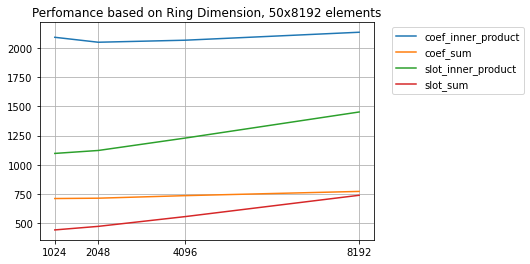

In [20]:
fig, ax = plt.subplots()
ax.plot(n50x8192_mean_df[n50x8192_mean_df['type'] == 'coef_inner_product'][' ringDim'], n50x8192_mean_df[n50x8192_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(n50x8192_mean_df[n50x8192_mean_df['type'] == 'coef_sum'][' ringDim'], n50x8192_mean_df[n50x8192_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(n50x8192_mean_df[n50x8192_mean_df['type'] == 'slot_inner_product'][' ringDim'], n50x8192_mean_df[n50x8192_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(n50x8192_mean_df[n50x8192_mean_df['type'] == 'slot_sum'][' ringDim'], n50x8192_mean_df[n50x8192_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Perfomance based on Ring Dimension, 50x8192 elements")
ax.grid('on')
plt.xticks([1024, 2048, 4096, 8192])
plt.show()

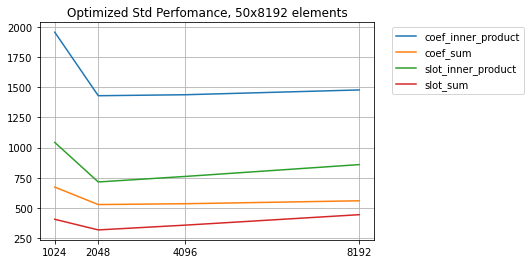

In [33]:
fig, ax = plt.subplots()
ax.plot(optimized_n50x8192_mean_df[optimized_n50x8192_mean_df['type'] == 'coef_inner_product'][' ringDim'], optimized_n50x8192_mean_df[optimized_n50x8192_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(optimized_n50x8192_mean_df[optimized_n50x8192_mean_df['type'] == 'coef_sum'][' ringDim'], optimized_n50x8192_mean_df[optimized_n50x8192_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(optimized_n50x8192_mean_df[optimized_n50x8192_mean_df['type'] == 'slot_inner_product'][' ringDim'], optimized_n50x8192_mean_df[optimized_n50x8192_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(optimized_n50x8192_mean_df[optimized_n50x8192_mean_df['type'] == 'slot_sum'][' ringDim'], optimized_n50x8192_mean_df[optimized_n50x8192_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Optimized Std Perfomance, 50x8192 elements")
ax.grid('on')
plt.xticks([1024, 2048, 4096, 8192])
plt.show()

In [8]:
n100x8192_mean_df = n100x8192_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
n100x8192_mean_df.loc[n100x8192_mean_df['type'] == 'n100x8192-coef-inner', 'type'] = 'coef_inner_product'
n100x8192_mean_df.loc[n100x8192_mean_df['type'] == 'n100x8192-coef-sum', 'type'] = 'coef_sum'
n100x8192_mean_df.loc[n100x8192_mean_df['type'] == 'n100x8192-slot-inner', 'type'] = 'slot_inner_product'
n100x8192_mean_df.loc[n100x8192_mean_df['type'] == 'n100x8192-slot-sum', 'type'] = 'slot_sum'

optimized_n100x8192_mean_df = optimized_n100x8192_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
optimized_n100x8192_mean_df.loc[optimized_n100x8192_mean_df['type'] == 'n100x8192-coef-inner', 'type'] = 'coef_inner_product'
optimized_n100x8192_mean_df.loc[optimized_n100x8192_mean_df['type'] == 'n100x8192-coef-sum', 'type'] = 'coef_sum'
optimized_n100x8192_mean_df.loc[optimized_n100x8192_mean_df['type'] == 'n100x8192-slot-inner', 'type'] = 'slot_inner_product'
optimized_n100x8192_mean_df.loc[optimized_n100x8192_mean_df['type'] == 'n100x8192-slot-sum', 'type'] = 'slot_sum'

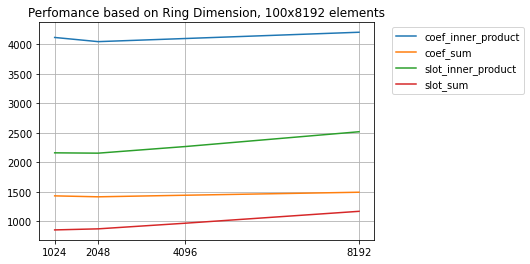

In [22]:
fig, ax = plt.subplots()
ax.plot(n100x8192_mean_df[n100x8192_mean_df['type'] == 'coef_inner_product'][' ringDim'], n100x8192_mean_df[n100x8192_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(n100x8192_mean_df[n100x8192_mean_df['type'] == 'coef_sum'][' ringDim'], n100x8192_mean_df[n100x8192_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(n100x8192_mean_df[n100x8192_mean_df['type'] == 'slot_inner_product'][' ringDim'], n100x8192_mean_df[n100x8192_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(n100x8192_mean_df[n100x8192_mean_df['type'] == 'slot_sum'][' ringDim'], n100x8192_mean_df[n100x8192_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Perfomance based on Ring Dimension, 100x8192 elements")
ax.grid('on')
plt.xticks([1024, 2048, 4096, 8192])
plt.show()

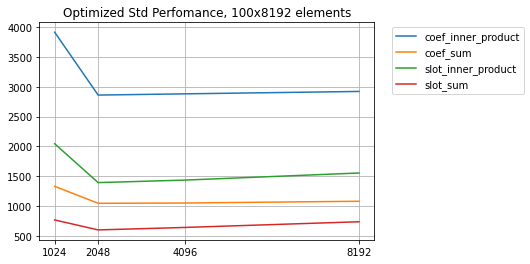

In [32]:
fig, ax = plt.subplots()
ax.plot(optimized_n100x8192_mean_df[optimized_n100x8192_mean_df['type'] == 'coef_inner_product'][' ringDim'], optimized_n100x8192_mean_df[optimized_n100x8192_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(optimized_n100x8192_mean_df[optimized_n100x8192_mean_df['type'] == 'coef_sum'][' ringDim'], optimized_n100x8192_mean_df[optimized_n100x8192_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(optimized_n100x8192_mean_df[optimized_n100x8192_mean_df['type'] == 'slot_inner_product'][' ringDim'], optimized_n100x8192_mean_df[optimized_n100x8192_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(optimized_n100x8192_mean_df[optimized_n100x8192_mean_df['type'] == 'slot_sum'][' ringDim'], optimized_n100x8192_mean_df[optimized_n100x8192_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Optimized Std Perfomance, 100x8192 elements")
ax.grid('on')
plt.xticks([1024, 2048, 4096, 8192])
plt.show()

In [9]:
n250x8192_mean_df = n250x8192_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
n250x8192_mean_df.loc[n250x8192_mean_df['type'] == 'n250x8192-coef-inner', 'type'] = 'coef_inner_product'
n250x8192_mean_df.loc[n250x8192_mean_df['type'] == 'n250x8192-coef-sum', 'type'] = 'coef_sum'
n250x8192_mean_df.loc[n250x8192_mean_df['type'] == 'n250x8192-slot-inner', 'type'] = 'slot_inner_product'
n250x8192_mean_df.loc[n250x8192_mean_df['type'] == 'n250x8192-slot-sum', 'type'] = 'slot_sum'

optimized_n250x8192_mean_df = optimized_n250x8192_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
optimized_n250x8192_mean_df.loc[optimized_n250x8192_mean_df['type'] == 'n250x8192-coef-inner', 'type'] = 'coef_inner_product'
optimized_n250x8192_mean_df.loc[optimized_n250x8192_mean_df['type'] == 'n250x8192-coef-sum', 'type'] = 'coef_sum'
optimized_n250x8192_mean_df.loc[optimized_n250x8192_mean_df['type'] == 'n250x8192-slot-inner', 'type'] = 'slot_inner_product'
optimized_n250x8192_mean_df.loc[optimized_n250x8192_mean_df['type'] == 'n250x8192-slot-sum', 'type'] = 'slot_sum'

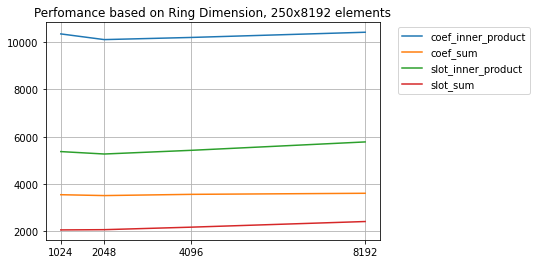

In [24]:
fig, ax = plt.subplots()
ax.plot(n250x8192_mean_df[n250x8192_mean_df['type'] == 'coef_inner_product'][' ringDim'], n250x8192_mean_df[n250x8192_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(n250x8192_mean_df[n250x8192_mean_df['type'] == 'coef_sum'][' ringDim'], n250x8192_mean_df[n250x8192_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(n250x8192_mean_df[n250x8192_mean_df['type'] == 'slot_inner_product'][' ringDim'], n250x8192_mean_df[n250x8192_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(n250x8192_mean_df[n250x8192_mean_df['type'] == 'slot_sum'][' ringDim'], n250x8192_mean_df[n250x8192_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Perfomance based on Ring Dimension, 250x8192 elements")
ax.grid('on')
plt.xticks([1024, 2048, 4096, 8192])
plt.show()

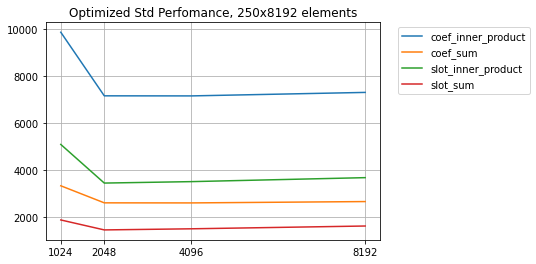

In [31]:
fig, ax = plt.subplots()
ax.plot(optimized_n250x8192_mean_df[optimized_n250x8192_mean_df['type'] == 'coef_inner_product'][' ringDim'], optimized_n250x8192_mean_df[optimized_n250x8192_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(optimized_n250x8192_mean_df[optimized_n250x8192_mean_df['type'] == 'coef_sum'][' ringDim'], optimized_n250x8192_mean_df[optimized_n250x8192_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(optimized_n250x8192_mean_df[optimized_n250x8192_mean_df['type'] == 'slot_inner_product'][' ringDim'], optimized_n250x8192_mean_df[optimized_n250x8192_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(optimized_n250x8192_mean_df[optimized_n250x8192_mean_df['type'] == 'slot_sum'][' ringDim'], optimized_n250x8192_mean_df[optimized_n250x8192_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Optimized Std Perfomance, 250x8192 elements")
ax.grid('on')
plt.xticks([1024, 2048, 4096, 8192])
plt.show()

In [10]:
n500x8192_mean_df = n500x8192_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
n500x8192_mean_df.loc[n500x8192_mean_df['type'] == 'n500x8192-coef-inner', 'type'] = 'coef_inner_product'
n500x8192_mean_df.loc[n500x8192_mean_df['type'] == 'n500x8192-coef-sum', 'type'] = 'coef_sum'
n500x8192_mean_df.loc[n500x8192_mean_df['type'] == 'n500x8192-slot-inner', 'type'] = 'slot_inner_product'
n500x8192_mean_df.loc[n500x8192_mean_df['type'] == 'n500x8192-slot-sum', 'type'] = 'slot_sum'

optimized_n500x8192_mean_df = optimized_n500x8192_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
optimized_n500x8192_mean_df.loc[optimized_n500x8192_mean_df['type'] == 'n500x8192-coef-inner', 'type'] = 'coef_inner_product'
optimized_n500x8192_mean_df.loc[optimized_n500x8192_mean_df['type'] == 'n500x8192-coef-sum', 'type'] = 'coef_sum'
optimized_n500x8192_mean_df.loc[optimized_n500x8192_mean_df['type'] == 'n500x8192-slot-inner', 'type'] = 'slot_inner_product'
optimized_n500x8192_mean_df.loc[optimized_n500x8192_mean_df['type'] == 'n500x8192-slot-sum', 'type'] = 'slot_sum'

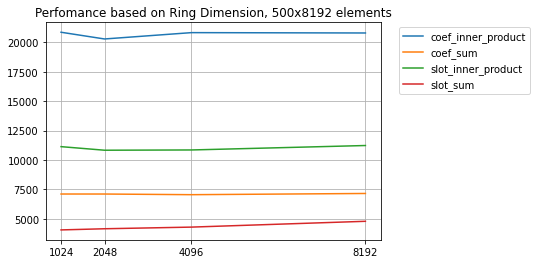

In [26]:
fig, ax = plt.subplots()
ax.plot(n500x8192_mean_df[n500x8192_mean_df['type'] == 'coef_inner_product'][' ringDim'], n500x8192_mean_df[n500x8192_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(n500x8192_mean_df[n500x8192_mean_df['type'] == 'coef_sum'][' ringDim'], n500x8192_mean_df[n500x8192_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(n500x8192_mean_df[n500x8192_mean_df['type'] == 'slot_inner_product'][' ringDim'], n500x8192_mean_df[n500x8192_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(n500x8192_mean_df[n500x8192_mean_df['type'] == 'slot_sum'][' ringDim'], n500x8192_mean_df[n500x8192_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Perfomance based on Ring Dimension, 500x8192 elements")
ax.grid('on')
plt.xticks([1024, 2048, 4096, 8192])
plt.show()

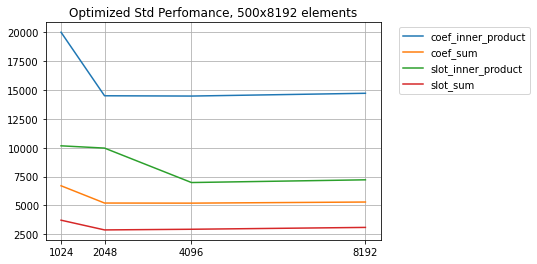

In [30]:
fig, ax = plt.subplots()
ax.plot(optimized_n500x8192_mean_df[optimized_n500x8192_mean_df['type'] == 'coef_inner_product'][' ringDim'], optimized_n500x8192_mean_df[optimized_n500x8192_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(optimized_n500x8192_mean_df[optimized_n500x8192_mean_df['type'] == 'coef_sum'][' ringDim'], optimized_n500x8192_mean_df[optimized_n500x8192_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(optimized_n500x8192_mean_df[optimized_n500x8192_mean_df['type'] == 'slot_inner_product'][' ringDim'], optimized_n500x8192_mean_df[optimized_n500x8192_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(optimized_n500x8192_mean_df[optimized_n500x8192_mean_df['type'] == 'slot_sum'][' ringDim'], optimized_n500x8192_mean_df[optimized_n500x8192_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Optimized Std Perfomance, 500x8192 elements")
ax.grid('on')
plt.xticks([1024, 2048, 4096, 8192])
plt.show()

In [11]:
n1000x8192_mean_df = n1000x8192_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
n1000x8192_mean_df.loc[n1000x8192_mean_df['type'] == 'n1000x8192-coef-inner', 'type'] = 'coef_inner_product'
n1000x8192_mean_df.loc[n1000x8192_mean_df['type'] == 'n1000x8192-coef-sum', 'type'] = 'coef_sum'
n1000x8192_mean_df.loc[n1000x8192_mean_df['type'] == 'n1000x8192-slot-inner', 'type'] = 'slot_inner_product'
n1000x8192_mean_df.loc[n1000x8192_mean_df['type'] == 'n1000x8192-slot-sum', 'type'] = 'slot_sum'

optimized_n1000x8192_mean_df = optimized_n1000x8192_df.groupby(['type', ' ringDim'], as_index=False)[' total'].mean()
optimized_n1000x8192_mean_df.loc[optimized_n1000x8192_mean_df['type'] == 'n1000x8192-coef-inner', 'type'] = 'coef_inner_product'
optimized_n1000x8192_mean_df.loc[optimized_n1000x8192_mean_df['type'] == 'n1000x8192-coef-sum', 'type'] = 'coef_sum'
optimized_n1000x8192_mean_df.loc[optimized_n1000x8192_mean_df['type'] == 'n1000x8192-slot-inner', 'type'] = 'slot_inner_product'
optimized_n1000x8192_mean_df.loc[optimized_n1000x8192_mean_df['type'] == 'n1000x8192-slot-sum', 'type'] = 'slot_sum'

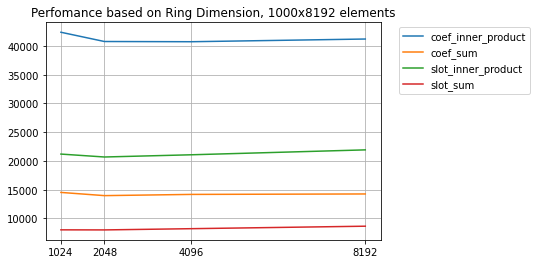

In [28]:
fig, ax = plt.subplots()
ax.plot(n1000x8192_mean_df[n1000x8192_mean_df['type'] == 'coef_inner_product'][' ringDim'], n1000x8192_mean_df[n1000x8192_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(n1000x8192_mean_df[n1000x8192_mean_df['type'] == 'coef_sum'][' ringDim'], n1000x8192_mean_df[n1000x8192_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(n1000x8192_mean_df[n1000x8192_mean_df['type'] == 'slot_inner_product'][' ringDim'], n1000x8192_mean_df[n1000x8192_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(n1000x8192_mean_df[n1000x8192_mean_df['type'] == 'slot_sum'][' ringDim'], n1000x8192_mean_df[n1000x8192_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Perfomance based on Ring Dimension, 1000x8192 elements")
ax.grid('on')
plt.xticks([1024, 2048, 4096, 8192])
plt.show()

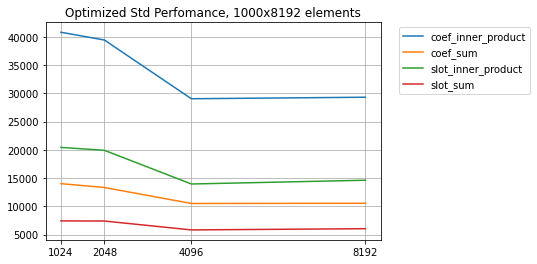

In [29]:
fig, ax = plt.subplots()
ax.plot(optimized_n1000x8192_mean_df[optimized_n1000x8192_mean_df['type'] == 'coef_inner_product'][' ringDim'], optimized_n1000x8192_mean_df[optimized_n1000x8192_mean_df['type'] == 'coef_inner_product'][' total'], label='coef_inner_product')
ax.plot(optimized_n1000x8192_mean_df[optimized_n1000x8192_mean_df['type'] == 'coef_sum'][' ringDim'], optimized_n1000x8192_mean_df[optimized_n1000x8192_mean_df['type'] == 'coef_sum'][' total'], label='coef_sum')
ax.plot(optimized_n1000x8192_mean_df[optimized_n1000x8192_mean_df['type'] == 'slot_inner_product'][' ringDim'], optimized_n1000x8192_mean_df[optimized_n1000x8192_mean_df['type'] == 'slot_inner_product'][' total'], label='slot_inner_product')
ax.plot(optimized_n1000x8192_mean_df[optimized_n1000x8192_mean_df['type'] == 'slot_sum'][' ringDim'], optimized_n1000x8192_mean_df[optimized_n1000x8192_mean_df['type'] == 'slot_sum'][' total'], label='slot_sum')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.25, 1))
ax.set_title("Optimized Std Perfomance, 1000x8192 elements")
ax.grid('on')
plt.xticks([1024, 2048, 4096, 8192])
plt.show()

In [17]:
optimized_n8192_mean_df

,type,ringDim,total
0,coef_inner_product,1024,35.08
1,coef_inner_product,2048,38.13
2,coef_inner_product,4096,45.13
3,coef_inner_product,8192,59.59
4,coef_sum,1024,17.54
5,coef_sum,2048,21.11
6,coef_sum,4096,29.25
7,coef_sum,8192,49.25
8,slot_inner_product,1024,34.16
9,slot_inner_product,2048,52.50
